# Question 1

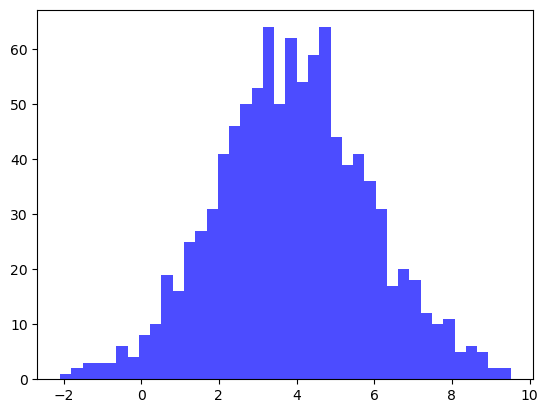

In [77]:
# Plot distribution
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

prob_3 = genfromtxt('problem_3_data.csv', delimiter=',')
plt.hist(prob_3, 40, facecolor='blue', alpha=0.7)
plt.show()

Looks like a gaussian distribution

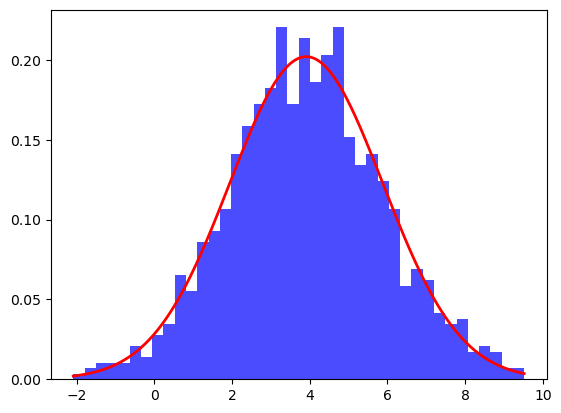

In [3]:
# Define gaussian distribution
def gaussian(x, mean, sd):
    return (1/(sd * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/sd)**2)

# Get x values and find matching y values for distribution
x = np.linspace(min(prob_3), max(prob_3), 1000)
mean = np.mean(prob_3)
sd = np.std(prob_3)
y = gaussian(x, mean, sd)

# Plot
plt.hist(prob_3, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()

# Question 2

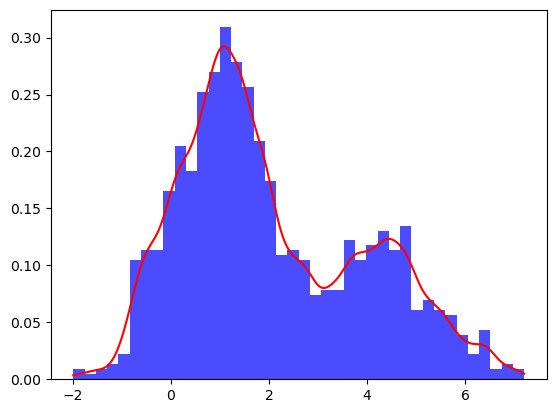

In [14]:
prob_4 = genfromtxt('problem_4_data.csv', delimiter=',')

x = np.linspace(np.min(prob_4), np.max(prob_4), 1000)

def gaussian(x, mean, sd):
    return (1/(sd * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/sd)**2)

n = len(prob_4)
sd = 0.2
pdf = 0
for i in range(n):
    pdf = pdf + gaussian(x, prob_4[i], sd)

pdf = pdf/n

plt.hist(prob_4, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, pdf, color='red')
plt.show()

# Question 3

In [197]:
# 1)
from scipy.integrate import quad

def f(x):
    return x**2 - 3*x + 4

result, err = quad(f, 0, 2)
print(f'Integral result: {result}')

Integral result: 4.666666666666666


In [198]:
# 2)
# uniform distribution between 0 and 2 is p(x) = 1/2
samples = np.random.uniform(0, 2, 100000)
n = len(samples)

mean = 2/n * sum(f(x) for x in samples)
print(f'Using sampling: {mean}')


Using sampling: 4.66519773853686


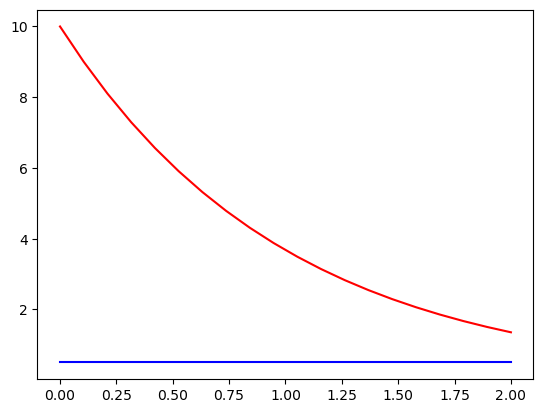

In [199]:
# 3)
k = 10
x = np.linspace(0,2, 20)
y1 = [1/2] * len(x)  # using uniform distribution
y2 = k*np.exp(-x)

plt.plot(x,y1, color='blue')
plt.plot(x,y2, color='red')
plt.show()

In [207]:
# Generate samples
def p(x):    # uniform distribution
        if 0<=x<=2:
            return 1/2
        else:
            return 0
    
samples_list = []
k = 10

for i in range(10000):
    u = np.random.exponential(scale=1)
    kq = k * np.exp(-u)

    v = kq * np.random.rand()

    if v <= p(u):
        samples_list.append(u)

n = len(samples_list)
mean = 2/n * sum(f(x) for x in samples_list)
print(f'Using rejection sampling: {mean}')

Using rejection sampling: 4.677569119185246


In [ ]:
# 4)
def p(x):    # uniform distribution
        if 0<=x<=2:
            return 1/2
        else:
            return 0
        
# make q(x) expential distribution
theta = 1
def q(x):
     return theta * np.exp(-theta * x)

# sample from exponential distribution
samples = np.random.exponential(scale=1, size=10000)
n = len(samples)

def g(x):
     return f(x) * (p(x)/q(x))

mean = 2/n * sum(g(x) for x in samples)
print(f'Using sampling: {mean}')


Using sampling: 4.667158285799363


# Question 4

1)

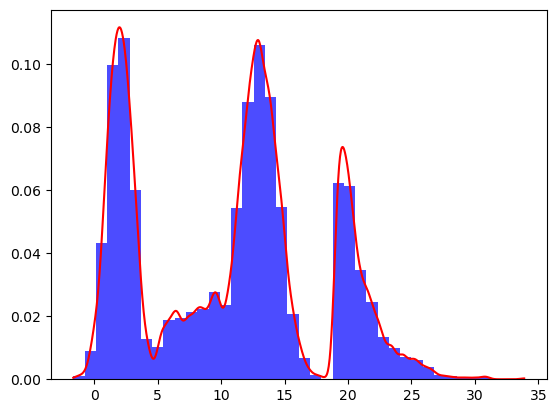

In [ ]:
# Get KDE p(x)
X = genfromtxt('complex_distribution.csv', delimiter=',')
n = len(X)

x = np.linspace(np.min(X), np.max(X), 1000)

def gaussian(x, mean, sd):
    return (1/(sd * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/sd)**2)

sd = 0.3
def p(x):
    pdf = 0
    for i in range(n):
        pdf = pdf + gaussian(x, X[i], sd)

    pdf = pdf/n
    return pdf

pdf = p(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, pdf, color='red')
plt.show()

2)

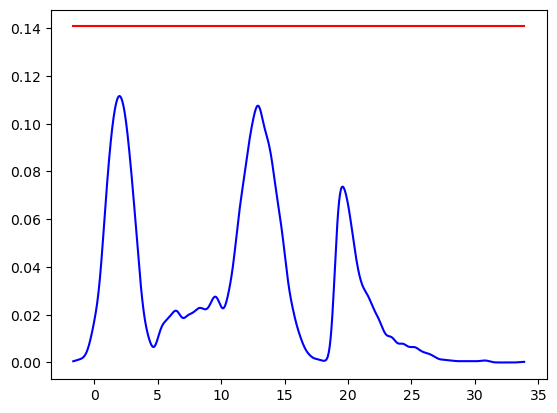

In [101]:
# find a k and distribution to use for rejection sampling
k = 5
x = np.linspace(np.min(X), np.max(X), 1000)
y1 = p(x)  # using KDE
y2 = [k*(1/(np.max(X)-np.min(x)))] * len(x)   # Use a uniform distribution

plt.plot(x,y1, color='blue')
plt.plot(x,y2, color='red')
plt.show()

In [ ]:
# find X hat samples
from scipy.stats import norm
# X_hat = np.array([])
k = 5

b = np.max(X)
a = np.min(X)

n = len(X)
sd = 0.3

def p(x):
    pdf = 0
    for i in range(n):
        pdf = pdf + gaussian(x, X[i], sd)

    pdf = pdf/n
    return pdf

def q(x):
    return np.where((a<=x) & (x<=b), 1/(b - a), 0)

u = np.random.uniform(a, b, 100000)
kq = k * q(u)
v = np.random.uniform(0, kq)
X_hat = u[v<=p(u)]


In [178]:
# KDE sampling
sd = 0.3  # use same sd as for KDE

b = np.max(X)
a = np.min(X)

X_bar = []
for i in range(10000):
    x = np.random.choice(X)

    sample = np.random.normal(x, sd, 1).item()
    X_bar.append(sample)

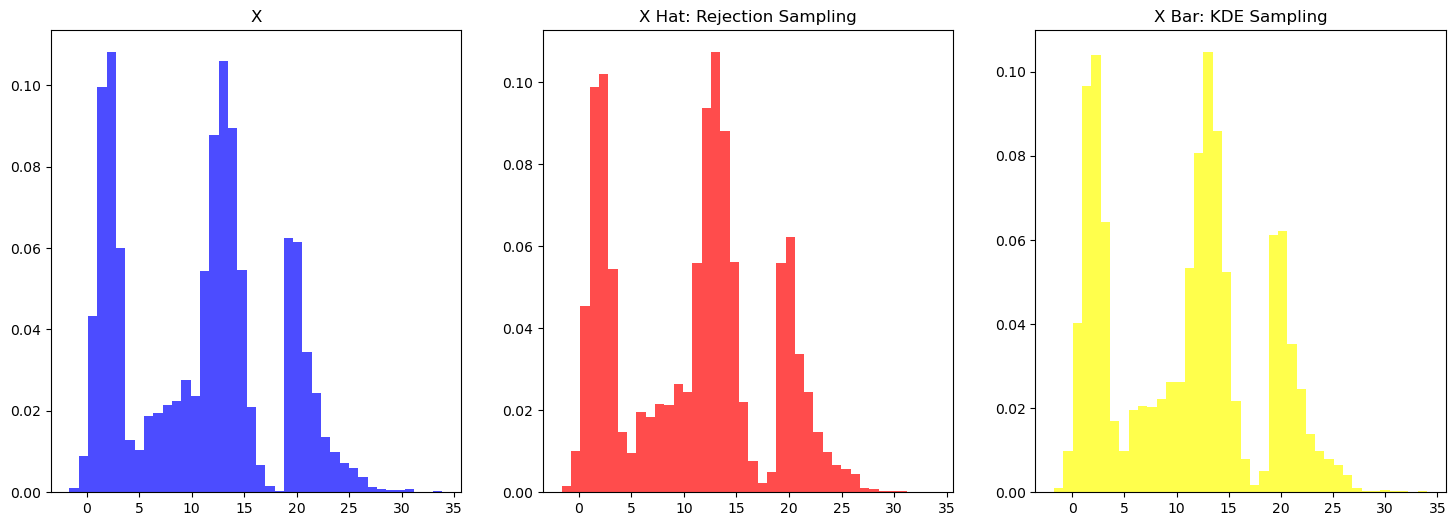

In [ ]:
# Plot sample
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.title("X")

plt.subplot(1, 3, 2)
plt.hist(X_hat, 40, facecolor='red', alpha=0.7, density=True)
plt.title("X Hat: Rejection Sampling")

plt.subplot(1, 3, 3)
plt.hist(X_bar, 40, facecolor='yellow', alpha=0.7, density=True)
plt.title("X Bar: KDE Sampling")

plt.show()

3)

In [180]:
# a)
print(f'E[X] for X is {np.mean(X)}')

E[X] for X is 10.814000119911924


In [181]:
# b)
print(f'Population variance for X: {np.var(X)}')

Population variance for X: 49.40961360042826


In [182]:
# c)

# define the functions
def f1(x):
    return 3*x + 2

def f2(x):
    return x**2 - 5*x 

def f3(x):
    return 2*np.exp(x) + 1

print(f'E[f1(X)]: {np.mean(f1(X))}')
print(f'E[f2(X)]: {np.mean(f2(X))}')
print(f'E[f3(X)]: {np.mean(f3(X))}')

E[f1(X)]: 34.44200035973577
E[f2(X)]: 112.28221159432371
E[f3(X)]: 258969297984.54385


4)

In [183]:
# a)
print(f'E[X] for X hat is {np.mean(X_hat)}')

E[X] for X hat is 10.873472488890455


In [184]:
# b)
print(f'Population variance for X_hat: {np.var(X_hat)}')

Population variance for X_hat: 48.65378137026473


In [185]:
# c)
X_hat = np.array(X_hat)
print(f'E[f1(X_hat)]: {np.mean(f1(X_hat))}')
print(f'E[f2(X_hat)]: {np.mean(f2(X_hat))}')
print(f'E[f3(X_hat)]: {np.mean(f3(X_hat))}')

E[f1(X_hat)]: 34.62041746667136
E[f2(X_hat)]: 112.51882289247004
E[f3(X_hat)]: 88128561649.5057


5)

In [186]:
# a)
print(f'E[X] for X bar is {np.mean(X_bar)}')

E[X] for X bar is 10.846578044613652


In [187]:
# b)
print(f'Population variance for X_bar: {np.var(X_bar)}')

Population variance for X_bar: 50.215118600121805


In [188]:
# c)
X_bar = np.array(X_bar)
print(f'E[f1(X_bar)]: {np.mean(f1(X_bar))}')
print(f'E[f2(X_bar)]: {np.mean(f2(X_bar))}')
print(f'E[f3(X_bar)]: {np.mean(f3(X_bar))}')

E[f1(X_bar)]: 34.539734133840966
E[f2(X_bar)]: 113.6304836549485
E[f3(X_bar)]: 253093123647.2277


# Question 5

In [190]:
def f(x):
    return np.log(x+1)

samples = np.random.uniform(0, 2, 100000)
n = len(samples)

mean = 2/n * sum(f(x) for x in samples)
print(f'Integral using sampling: {mean}')

Integral using sampling: 1.2974857420715482


# Question 6

In [191]:
def f(x):
    return x**2 - x + 1

samples = np.random.uniform(0, 1, 100000)
n = len(samples)

mean = 1/n * sum(f(x) for x in samples)
print(f'Integral using sampling: {mean}')

Integral using sampling: 0.833636464048296


In [193]:
# Check answer
result, err = quad(f, 0, 1)
print(f'Checked answer using scipy integration: {result}')

Checked answer using scipy integration: 0.8333333333333334
